### Q1. Describe the dataset you chose. Why did you choose it? What features does it include? What year is it from? How was it collected? What should we know about this dataset as we read your writeup? (4pts)

The dataset chosen is the "Credit Approval" dataset, available at the UCI Machine Learning Repository. I chose this dataset because it is a classic and well-known dataset in the field of credit risk analysis. It contains information about credit card applications, and the goal is to predict whether a given application will be approved or not. Since this dataset concerns credit card applications, all attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

The dataset contains 15 features including the credit card's age, gender, debt-to-income ratio, employment status, and credit score. The dataset contains 690 rows and 15 columns. 
The target variable is a binary classification of whether the credit card application is approved or not. The dataset was first published in 1994, and it was last updated in 1996.

The dataset was collected by a Taiwanese bank between 1987 and 1990. The bank was interested in developing a system to automatically approve or reject credit card applications. The dataset includes a mix of both numerical and categorical data, and some features have missing values.

As we read the writeup, it's important to keep in mind that this dataset is over two decades old and may not reflect the current state of credit risk analysis. Additionally, the dataset has some missing values and may require some preprocessing before analysis. Finally, it's important to note that the dataset was collected by a Taiwanese bank and may not generalize to other countries or cultures.

### Q2. Define a research question. What are you trying to predict? Describe what you're trying to accomplish (it will differ between Supervised and Unsupervised learning) (4pts)

Research Question: Can we predict credit card approval for any individual using the features available in the Credit Approval dataset?

The goal is to build a good machine learning model that can accurately predict whether a credit card application will be approved or not. This is a supervised learning problem, as we have labeled data indicating credit card approval. The target variable is a binary classification of whether the credit card application is approved or not.

In this assignment, I will create and train a decision tree model that will predict the same. I try making changes to my model's parameters and try using variations of Decision Tree Classifiers to see which ones are most suited to the above data set.

### Q3. Why is this algorithm a good way of answering your research question? (2pts)

The decision tree classifier was a good choice according to me for resolving this issue since it is capable of handling both category and numerical data, both of which are included in the credit card approval dataset. Furthermore, decision trees are simple to read and explain, which is critical for anticipating credit card approvals. The decision tree may also uncover crucial traits that contribute the most to the target variable, which can be useful in discovering critical aspects that impact people's chances of obtaining credit cards accepted.

### Q.4 Using the data you chose and the algorithm you chose, read in your data and run your model. (6pts)

Done below

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit= pd.read_csv("credit-approval.csv")

In [3]:
credit.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [4]:
credit.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    float64
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [6]:
credit.isna().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [7]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(credit)

In [8]:
credit = credit.drop("ZipCode", axis=1)

In [9]:
# Replace "?" with NaN
credit.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
credit["Age"] = pd.to_numeric(credit["Age"])

In [10]:
#replace missing values with mean values of numeric columns
credit.fillna(credit.mean(), inplace=True)

/var/folders/nv/hnbnn2j55rn9qjvln6sd3hxm0000gn/T/ipykernel_57265/4176215215.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit.fillna(credit.mean(), inplace=True)


In [11]:
credit.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
Income            0
Approved          0
dtype: int64

In [12]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in credit:
    if credit[col].dtypes=='object':
        credit[col]=le.fit_transform(credit[col])

In [13]:
credit.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,0,0
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,0,560,0
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,1,0,3,0
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,0,2,0,0
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,1,0,0,0
6,1,33.17,1.040,1,0,11,3,6.500,1,0,0,1,0,31285,0
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,0,1349,0
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,0,314,0
9,1,42.50,4.915,2,2,12,7,3.165,1,0,0,1,0,1442,0


In [14]:
#HOT ENCODER
#convert to categorical data to dummy data
credit_dummies = pd.get_dummies(credit, columns=[ "Married","EducationLevel", "Citizen", "DriversLicense", "Ethnicity"])
credit_dummies.head()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,DriversLicense_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
0,1,30.83,0.000,0,1.25,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,58.67,4.460,0,3.04,1,1,6,560,0,...,0,0,0,0,1,0,0,0,0,0
2,0,24.50,0.500,0,1.50,1,0,0,824,0,...,0,0,0,0,1,0,0,0,0,0
3,1,27.83,1.540,0,3.75,1,1,5,3,0,...,1,0,0,0,0,0,0,0,1,0
4,1,20.17,5.625,0,1.71,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


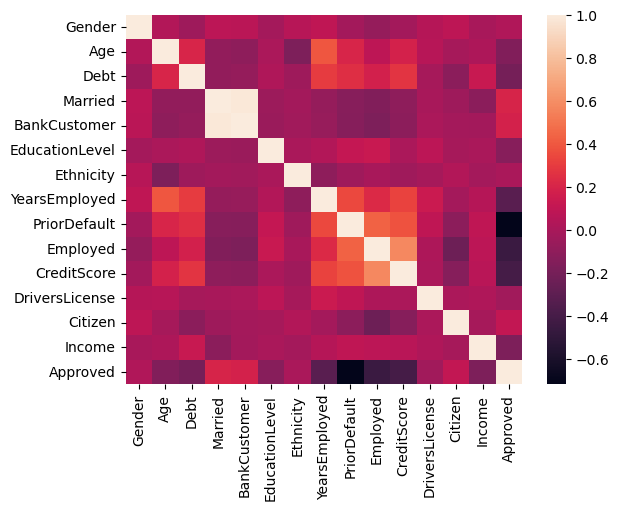

In [15]:
corr = credit.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

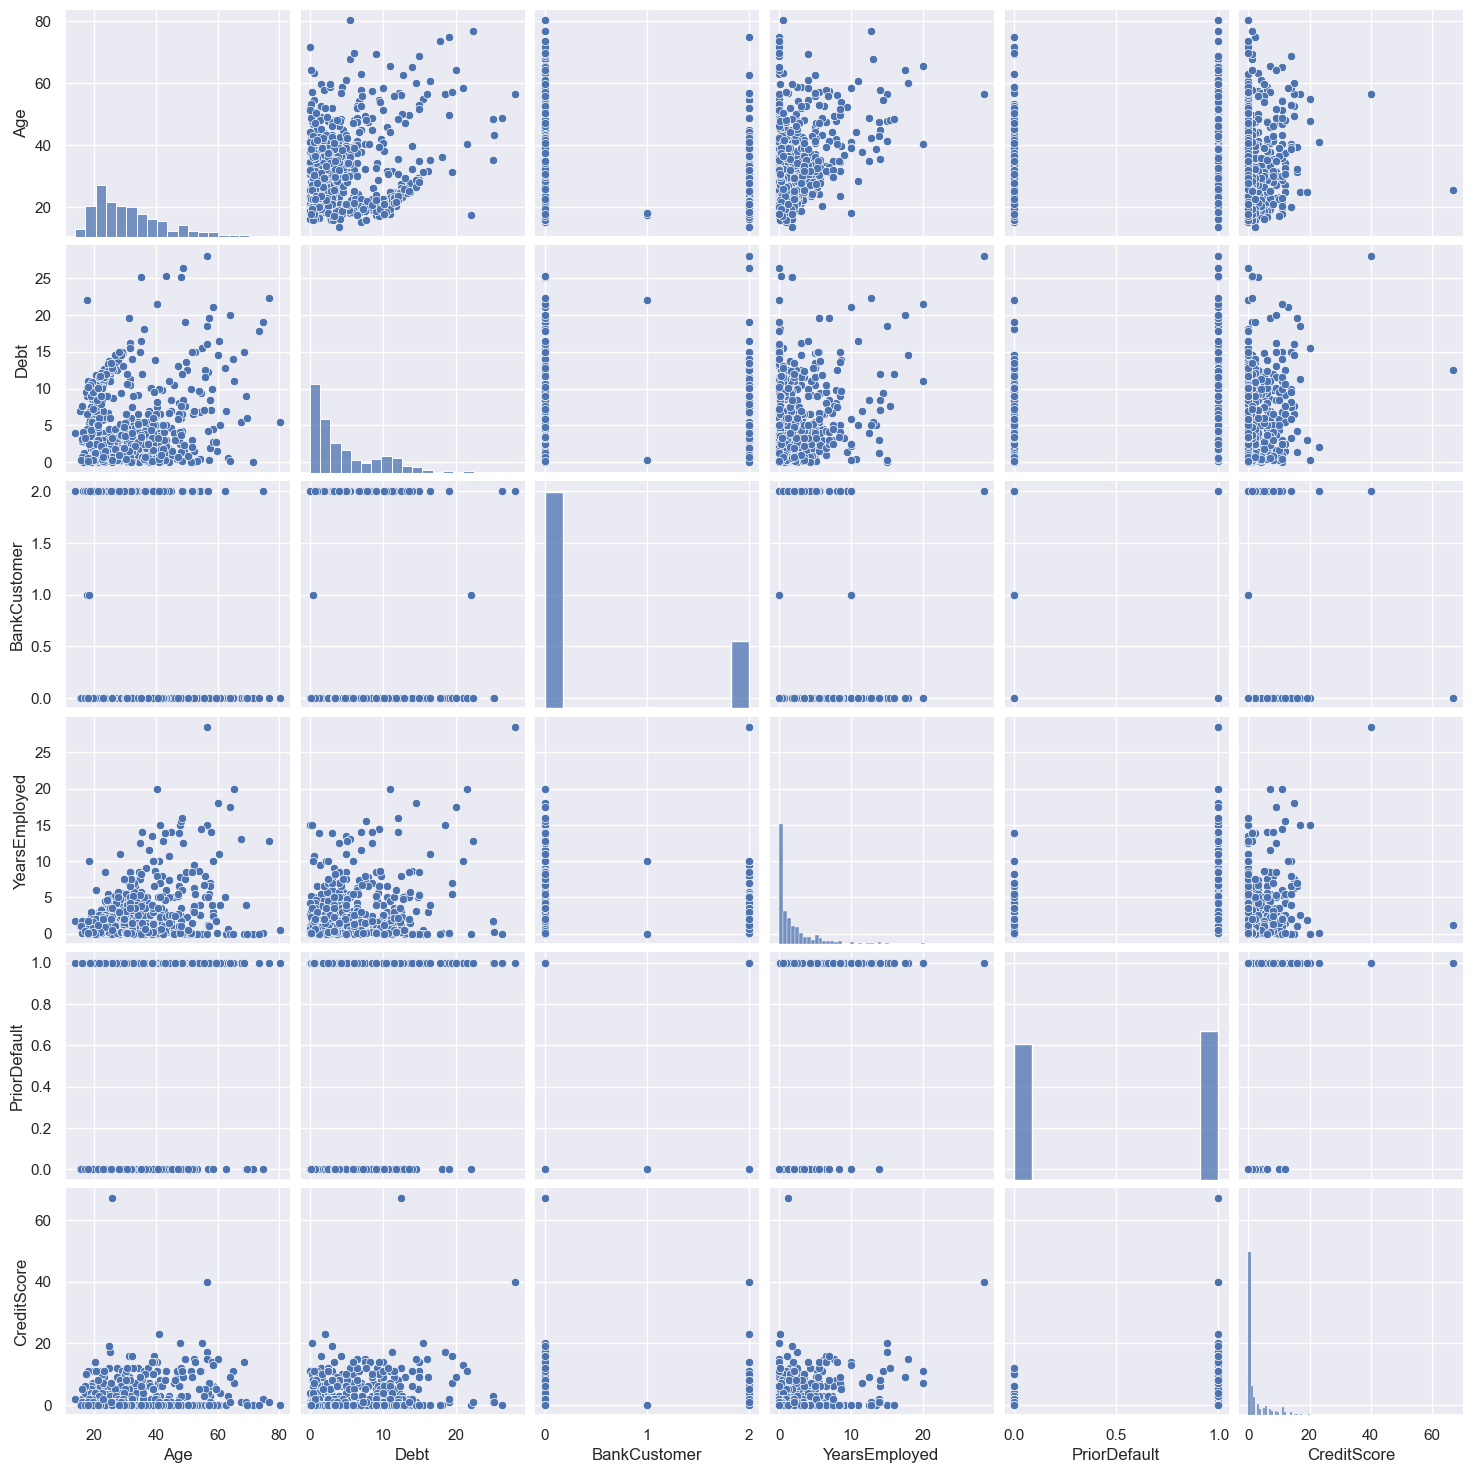

In [16]:
#scatterplot
sns.set()
cols = ['Age', 'Debt', 'BankCustomer','YearsEmployed','PriorDefault','CreditScore']
sns.pairplot(credit[cols], height = 2.5)
plt.show()

In [17]:
credit.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
Income            0
Approved          0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X = credit.drop("Approved", axis=1)
y = credit['Approved']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [20]:
#decision tree classifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [21]:
# We need to evaluate our results. There are various metrics that can be used for this. 
acc_dtc = metrics.accuracy_score(y_test, y_pred)*100
print(classification_report(y_test,y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        63
           1       0.80      0.81      0.81        75

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138

Accuracy: 78.98550724637681


array([[48, 15],
       [14, 61]])

### Q.5 Tinker with parameters at least 3 times

#### Setting maximum depth = 3 for the tree

In [22]:
# Set max depth = 3 for DecisionTreeClassifier
model_max_depth = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model_max_depth = model_max_depth.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_md = model_max_depth.predict(X_test)

In [23]:
# We need to evaluate our results. There are various metrics that can be used for this. 
acc_max_depth = metrics.accuracy_score(y_test, y_pred_md)*100
print(classification_report(y_test,y_pred_md))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_md)*100)
confusion_matrix(y_test,y_pred_md)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        63
           1       0.95      0.79      0.86        75

    accuracy                           0.86       138
   macro avg       0.87      0.87      0.86       138
weighted avg       0.88      0.86      0.86       138

Accuracy: 86.23188405797102


array([[60,  3],
       [16, 59]])

#### Using RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Create RandomForestClassifier object
model_rfc = RandomForestClassifier()

# Train RandomForestClassifier
model_rfc = model_rfc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rfc = model_rfc.predict(X_test)

In [25]:
# We need to evaluate our results. There are various metrics that can be used for this. 
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)*100
print(classification_report(y_test,y_pred_rfc))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc)*100)
confusion_matrix(y_test,y_pred_rfc)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        63
           1       0.92      0.91      0.91        75

    accuracy                           0.91       138
   macro avg       0.90      0.91      0.91       138
weighted avg       0.91      0.91      0.91       138

Accuracy: 90.57971014492753


array([[57,  6],
       [ 7, 68]])

#### Using AdaBoostClassifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier

# Create AdaBoost classifer object
model_adb = AdaBoostClassifier()

# Train AdaBoost Classifer
model_adb = model_adb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_adb = model_adb.predict(X_test)

In [27]:
# We need to evaluate our results. There are various metrics that can be used for this. 
acc_adb = metrics.accuracy_score(y_test, y_pred_adb)*100
print(classification_report(y_test,y_pred_adb))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adb)*100)
confusion_matrix(y_test,y_pred_adb)

              precision    recall  f1-score   support

           0       0.77      0.94      0.84        63
           1       0.93      0.76      0.84        75

    accuracy                           0.84       138
   macro avg       0.85      0.85      0.84       138
weighted avg       0.86      0.84      0.84       138

Accuracy: 84.05797101449275


array([[59,  4],
       [18, 57]])

### Q.6 Report the accuracy of your model. How did accuracy change with your parameter tinkering? (3pts)


In [28]:
print("The Accuracy of Decision Tree Classifier was:", acc_dtc)
print("The Accuracy of Decision Tree with max depth=3 was:", acc_max_depth)
print("The Accuracy of Random Forest Classifier was:", acc_rfc)
print("The Accuracy of AdaBoost Classifier was:", acc_adb)

The Accuracy of Decision Tree Classifier was: 78.98550724637681
The Accuracy of Decision Tree with max depth=3 was: 86.23188405797102
The Accuracy of Random Forest Classifier was: 90.57971014492753
The Accuracy of AdaBoost Classifier was: 84.05797101449275


As seen, implementing RandomForestClassifer gives us the highest accuracy. And changing parameters or using different variants of DecisionTrees shows an increase in accuracy as well. 

### Q7. Create a visualization demonstrating your findings. Make sure to include a title and axis labels. Describe what's being shown in your visualization. (3pts)

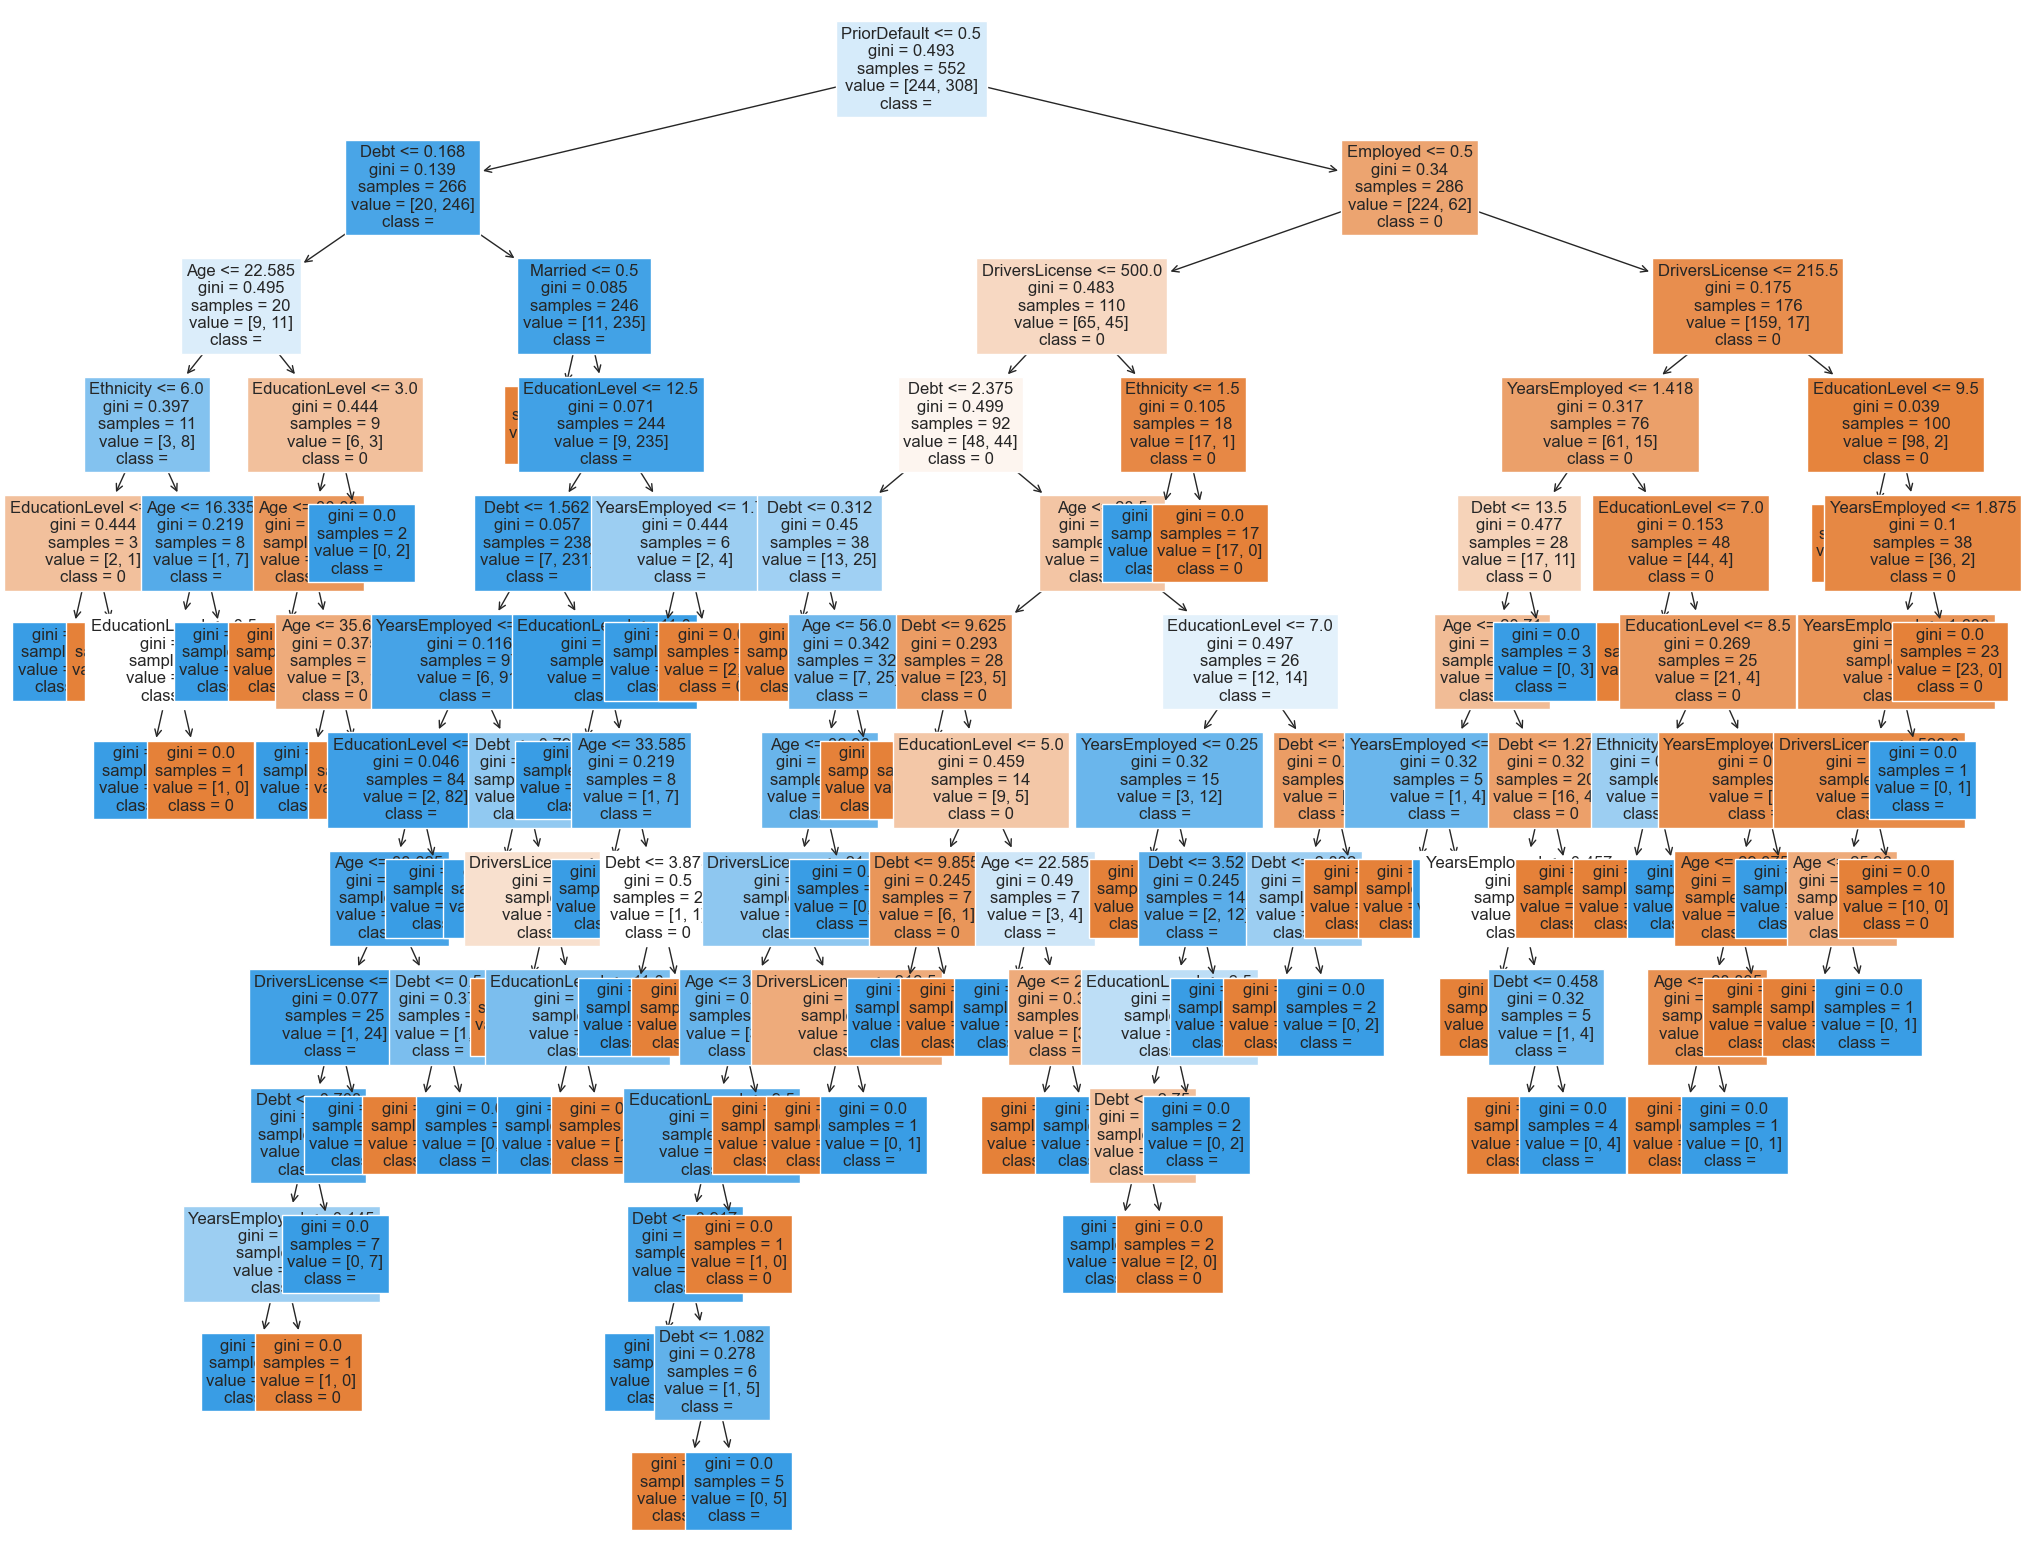

In [29]:
#graphing the decision tree

from sklearn import tree

feature_cols = ['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','Citizen','Income','DriversLicense']
target_names = credit['Approved']
fig = plt.figure(figsize=(25,20))
plot1 = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=str(target_names),
                   filled=True, fontsize=12)

plt.show()

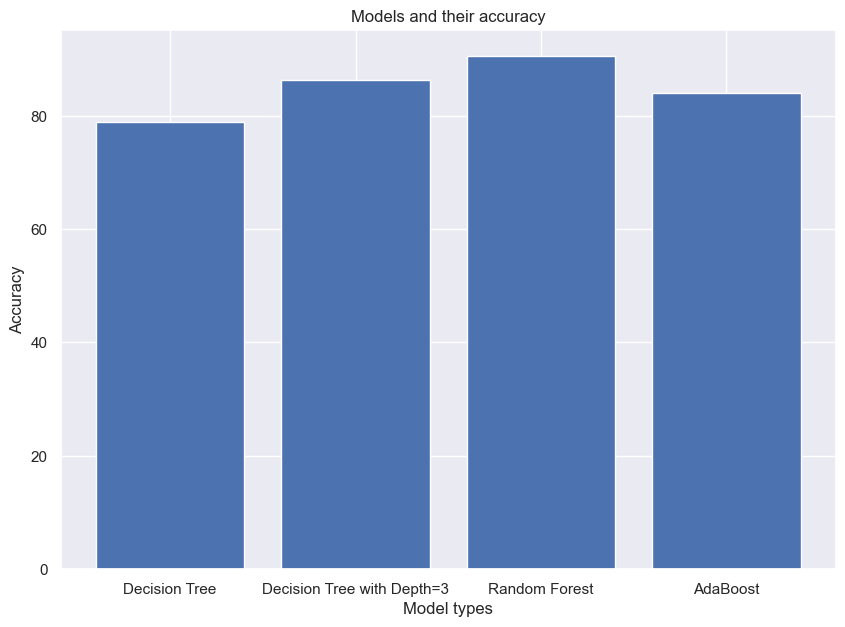

In [30]:
x = np.array(['Decision Tree','Decision Tree with Depth=3','Random Forest', 'AdaBoost'])
y = np.array([acc_dtc, acc_max_depth, acc_rfc, acc_adb], dtype = 'float')

plt.figure(figsize=(10,7))
plt.bar(x, y)
plt.title('Models and their accuracy')
plt.xlabel('Model types')
plt.ylabel('Accuracy')
plt.show()


From the above visualization of the decision tree it can be seen that PriorDefault, Debt and CreditScore are the features which provide the most information gain which is why they are towards the root of the tree. From the bar graph, we can compare the accuracies of our decision tree model and its variations. It can be seen that the best accuracy is when we use the RandomForestClassifier and the poorest accuracy is with the DecisionTreeClassifier

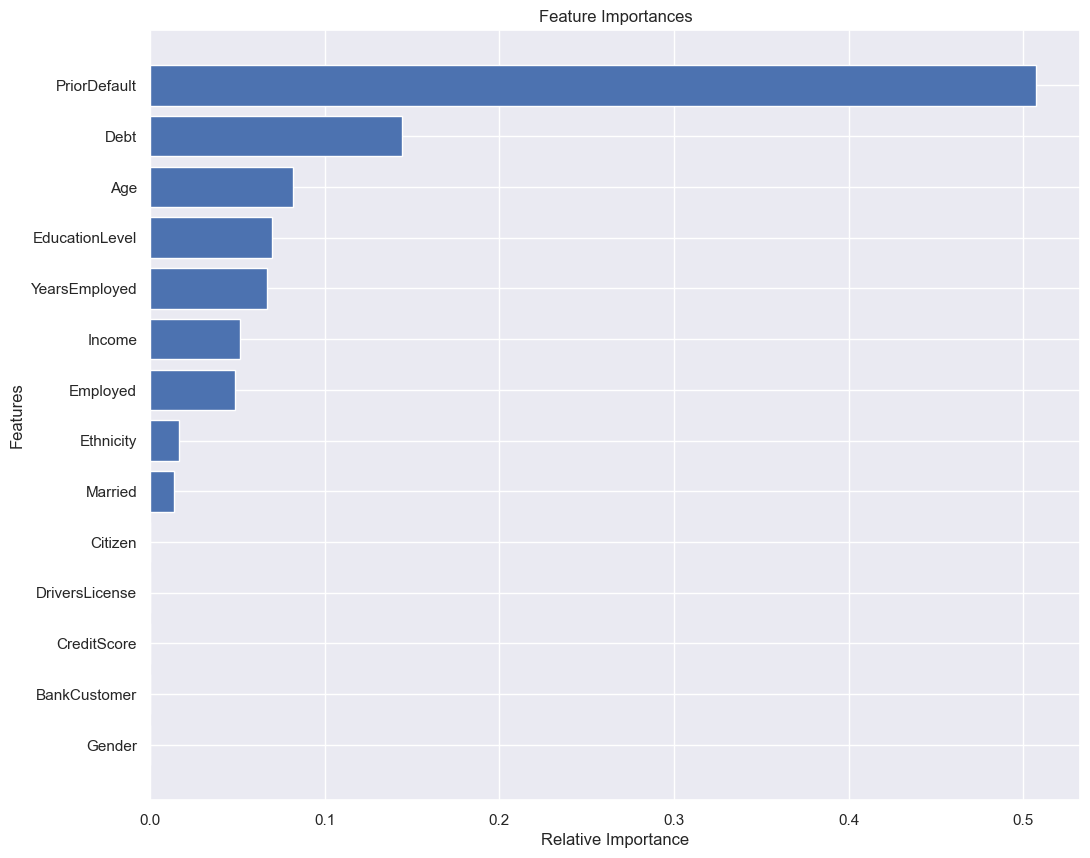

In [33]:
credit_features = credit.drop(['Approved'], axis=1)
features = credit_features.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

As seen here, the most important features in the dataset, when compared relatively to the other features are PriorDefault, Debt and Age. 

### Q8. What challenges did you run into? Do you think it was because of the data, the model, the research question? How would you overcome these challenges? (4pts)


One challenge that I encountered while working with the Credit Approval dataset is the presence of missing values in some of the features. This can be due to a variety of reasons, such as data entry errors or missing information from the credit card application.

Since all the features with missing values were categorical features, I filled the missing values with their mode values. 
The only feature which was numerical and had missing values was ZipCode, but since it is not an essential feature for predicting credit card approvals in the presence of the other features present, I dropped the entries with missing values. 

Another challenge was trying to understand the data, since attribute names and values had been changed to meaningless symbols to protect confidentiality of the data. But eventually since that concerned categorical data, I used LabelEncoding to convert them into numerical values, and ensured that it increases model performance instead of impacting it. 

### Q9. We learned a little bit about how our models can affect real people in the world. Name 2 potential benefits of your model and 2 potential harms. You can even look at the Wikipedia page on Algorithmic BiasLinks to an external site. for inspiration. Every model has consequences, what can you think of? If your data is really not amenable to this question, simply write about any other example we covered in class, such as the Boston housing dataset or hate speech detectors.

Potential benefits of the credit approval model:

Increased Efficiency: The model can automate the credit approval process and help the bank make faster decisions while reducing the risk of fraud or default. This can save time for both the bank and the applicants.

Fairness: By using a machine learning model, we can reduce the risk of human bias and ensure that credit card applications are evaluated fairly, based on objective criteria such as age, gender, debt-to-income ratio, employment status, and credit score.

Potential harms of the credit approval model:

Discrimination: There is a risk that the model may discriminate against certain groups of people, such as minorities or individuals with lower income, if these factors are correlated with credit card approval. This can lead to unfair treatment and perpetuate existing biases.

Inaccuracy: If the model is not trained properly or if it is based on biased data, it may lead to inaccurate predictions and cause financial harm to both the bank and the applicants. This can result in missed opportunities for creditworthy individuals and higher risk of defaults for the bank.



### Q10. Name one research question you might ask next for future work (don't worry, you don't have to do it!) Why is it important? (2pts)

A possible research question for future work on the Credit Approval dataset could be: "Can we build a model that accurately predicts credit card approval while also ensuring fairness for all applicants, regardless of their gender or race?"

This question is important because there is a risk that the model may discriminate against certain groups of people, as I mentioned earlier. By ensuring fairness in the credit approval process, we can help promote social justice and reduce the perpetuation of systemic biases. There are various approaches that can be taken to address fairness in machine learning, such as using fair algorithms, balancing the representation of different groups in the dataset, or measuring and mitigating the impact of the model on different groups.